## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [11]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [12]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 8       2       6       1       4       

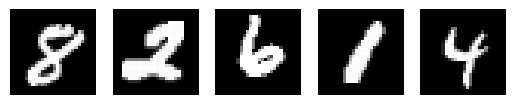

In [13]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [14]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(x_train.shape[0], 784)                                       # flatten the images of training set
x_test_flatten = x_test.reshape(x_test.shape[0], 784)                                        # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

x_validation = x_train_flatten[:n_validation]
y_validation = y_train[:n_validation]

x_train_flatten = x_train_flatten[n_validation:]
y_train = y_train[n_validation:]


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [15]:
model = keras.models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [16]:
model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

n_epochs = 42              # set number of epochs
batch_size = 512            # you can tweak with these parametrs
history = model.fit(x_train_flatten, y_train, epochs = n_epochs, batch_size = batch_size, validation_data=(x_validation, y_validation), shuffle = True)

Epoch 1/42
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7046 - loss: 24.7190 - val_accuracy: 0.9170 - val_loss: 0.8181
Epoch 2/42
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9316 - loss: 0.5751 - val_accuracy: 0.9290 - val_loss: 0.5350
Epoch 3/42
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9541 - loss: 0.2762 - val_accuracy: 0.9408 - val_loss: 0.4668
Epoch 4/42
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9699 - loss: 0.1569 - val_accuracy: 0.9441 - val_loss: 0.4093
Epoch 5/42
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9772 - loss: 0.0941 - val_accuracy: 0.9470 - val_loss: 0.3879
Epoch 6/42
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9852 - loss: 0.0545 - val_accuracy: 0.9526 - val_loss: 0.3773
Epoch 7/42
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9878 - loss: 0.0419 - val_accuracy: 0.9527 - val_loss: 0.3581
Epoch 8/42
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9927 - loss: 0.0241 - val_accuracy: 0.9519 - 

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9651 - loss: 0.5095
Loss =  0.4182591438293457
Accuracy =  96.90999984741211 %


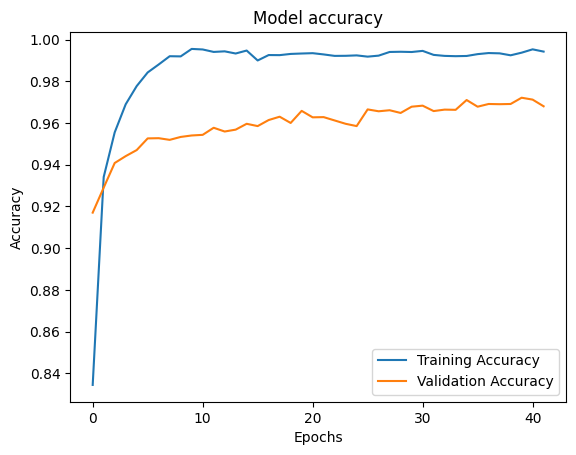

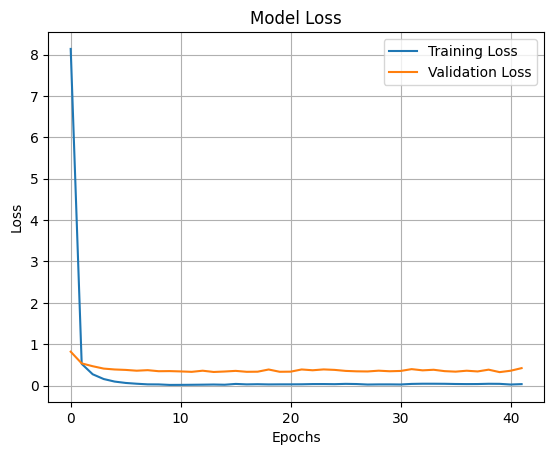

In [17]:
results = model.evaluate(x_test_flatten, y_test)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

Lets show our results on images from testing dataset

label: 
8       3       5       9       8       1       1       

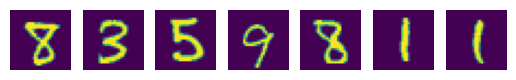

Predicted value: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1      

In [18]:
n = 7   # = no. of images to see predictions on

index = np.random.choice(len(x_test_flatten), size = n, replace = False)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test_flatten[ind].reshape(28, 28))             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="       ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i,ind in enumerate(index):
    # write code to predict and print digit in image
    # Hint: the output of the model is a 10-d vector which gives probabilties
    # The digit in the image would be the class for which probability is hghest...
    pred =model.predict(x_test_flatten[ind].reshape(1,784))
    digit = pred.argmax()
    print(digit,end="      ")